### **Laplacian算子**

* 之前边缘检测算子都具有方向性，需要分别求取x方向的边缘和y方向的边缘，之后综合得到整体边缘

* Laplacian算子只需要进行一次边缘检测，是一种二阶导数算子，对噪声敏感，因此需要配合高斯滤波使用
$$Laplacian(f)= \frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}$$

* 滤波器的大小必须为正奇数，当等于1时，Laplacian算子如下所示：$$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0\end{bmatrix}$$

In [29]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [30]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png', cv.IMREAD_ANYCOLOR)
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [31]:
# 为了更好地展现边缘提取，此处定义函数使图像反向
def image_invert(img):
    h, w = img.shape[:2]  # 图片的高度和宽度
    imgInv = np.empty((w, h), np.uint8)  # 创建空白数组
    for i in range(h):
        for j in range(w):
            imgInv[i][j] = 255 - img[i][j]
    return imgInv

In [32]:
# 未滤波提取图像边缘
result = cv.Laplacian(img, cv.CV_16S, ksize=3, scale=1, delta=0)
result = cv.convertScaleAbs(result)
result = image_invert(result)
# 滤波后提取图像边缘
result_gauss = cv.GaussianBlur(img, (3, 3), 5, 10, 10)
result_gauss = cv.Laplacian(result_gauss, cv.CV_16S, ksize=3, scale=1, delta=0)
result_gauss = cv.convertScaleAbs(result_gauss)
result_gauss = image_invert(result_gauss)

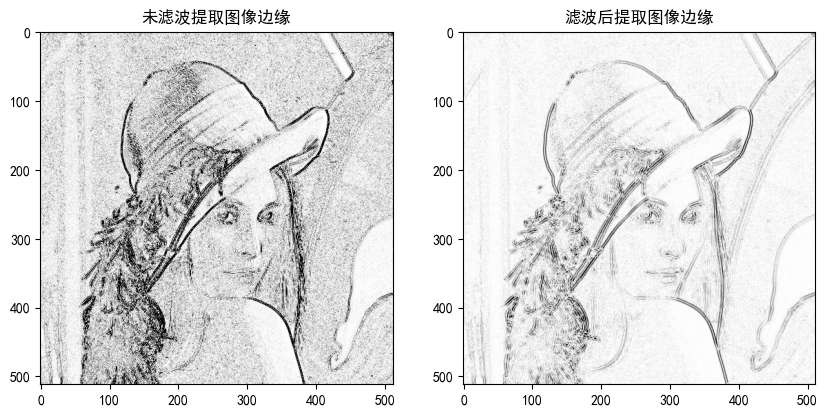

In [33]:
# 展示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('未滤波提取图像边缘')
plt.imshow(result, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('滤波后提取图像边缘')
plt.imshow(result_gauss, cmap='gray')